<a href="https://colab.research.google.com/github/tejareddytadi/Brain-Tumor-Detection-using-CNN/blob/main/Efficient_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
current_directory = os.getcwd()
for dirname, _, filenames in os.walk('current_directory'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [ ]:
folder_path_no = "/content/drive/MyDrive/Brain_Tumor_Detection/no"
folder_path_yes = "/content/drive/MyDrive/Brain_Tumor_Detection/yes"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

1500
1500


In [ ]:
## We can consider
   # No Tumor  >> 0
   # Yes Tumor >> 1

no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)

labels = no_label + yes_label
print(len(labels))

3000


In [ ]:
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Define paths to your image folders
path_no = "/content/drive/MyDrive/Brain_Tumor_Detection/no/"
path_yes = "/content/drive/MyDrive/Brain_Tumor_Detection/yes/"

# Define image dimensions
img_width, img_height = 224, 224

# Use ImageDataGenerator for efficient loading and augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images using the generators
data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

# Optionally, you can add labels (0 for 'no' class and 1 for 'yes' class)
labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

# Concatenate the data and labels
data = np.concatenate([data_no, data_yes])
labels = np.concatenate([labels_no, labels_yes])

# Shuffle the data and labels together
data, labels = shuffle(data, labels, random_state=42)

In [ ]:
data = []

for img in folder_no:
    image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/no/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/yes/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [ ]:
len(data)

3000

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

EFFICINET NET 2016

In [ ]:
path = "https://tfhub.dev/google/efficientnet/b0/classification/1" # 224x224x3
efficient_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

eff_model = Sequential()
eff_model.add(efficient_model)
eff_model.add(Dense(units=1, activation="sigmoid"))
eff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 5331565 (20.34 MB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 5330564 (20.33 MB)
_________________________________________________________________


Epoch 1/20
75/75 [==============================] - 17s 115ms/step - loss: 0.3926 - accuracy: 0.8263 - val_loss: 0.2896 - val_accuracy: 0.9000
Epoch 2/20
75/75 [==============================] - 6s 75ms/step - loss: 0.2122 - accuracy: 0.9304 - val_loss: 0.2110 - val_accuracy: 0.9300
Epoch 3/20
75/75 [==============================] - 6s 74ms/step - loss: 0.1666 - accuracy: 0.9438 - val_loss: 0.1753 - val_accuracy: 0.9383
Epoch 4/20
75/75 [==============================] - 6s 74ms/step - loss: 0.1402 - accuracy: 0.9521 - val_loss: 0.1535 - val_accuracy: 0.9450
Epoch 5/20
75/75 [==============================] - 6s 79ms/step - loss: 0.1250 - accuracy: 0.9571 - val_loss: 0.1386 - val_accuracy: 0.9467
Epoch 6/20
75/75 [==============================] - 6s 77ms/step - loss: 0.1146 - accuracy: 0.9629 - val_loss: 0.1339 - val_accuracy: 0.9517
Epoch 7/20
75/75 [==============================] - 6s 80ms/step - loss: 0.1040 - accuracy: 0.9679 - val_loss: 0.1188 - val_accuracy: 0.9567
Epoch 8/20


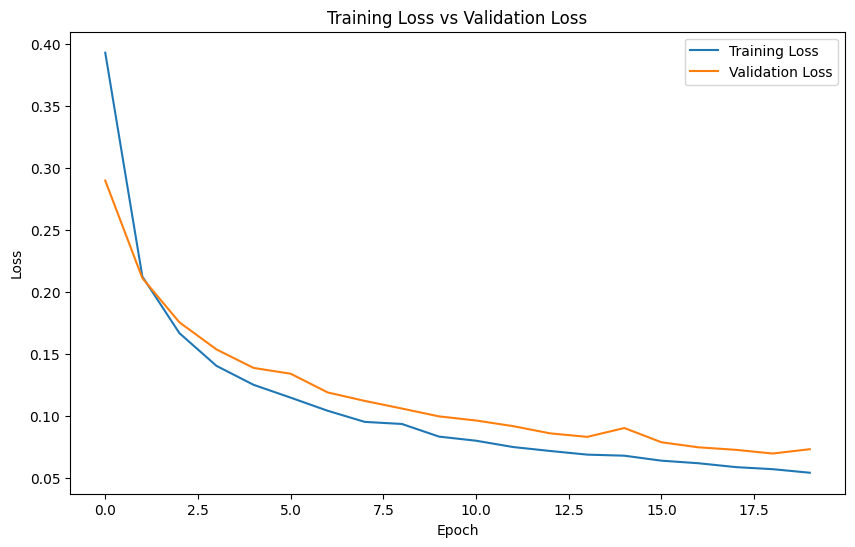

In [ ]:
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = eff_model.fit(x_train_scaled , y_train,
           epochs=20, validation_data=(x_test_scaled,y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs 30

Epoch 1/30
75/75 [==============================] - 17s 117ms/step - loss: 0.3731 - accuracy: 0.8342 - val_loss: 0.2412 - val_accuracy: 0.9250
Epoch 2/30
75/75 [==============================] - 6s 76ms/step - loss: 0.1997 - accuracy: 0.9358 - val_loss: 0.1960 - val_accuracy: 0.9383
Epoch 3/30
75/75 [==============================] - 6s 77ms/step - loss: 0.1560 - accuracy: 0.9538 - val_loss: 0.1674 - val_accuracy: 0.9450
Epoch 4/30
75/75 [==============================] - 6s 74ms/step - loss: 0.1324 - accuracy: 0.9554 - val_loss: 0.1543 - val_accuracy: 0.9517
Epoch 5/30
75/75 [==============================] - 6s 79ms/step - loss: 0.1169 - accuracy: 0.9642 - val_loss: 0.1500 - val_accuracy: 0.9417
Epoch 6/30
75/75 [==============================] - 6s 77ms/step - loss: 0.1069 - accuracy: 0.9692 - val_loss: 0.1379 - val_accuracy: 0.9450
Epoch 7/30
75/75 [==============================] - 6s 76ms/step - loss: 0.0962 - accuracy: 0.9712 - val_loss: 0.1253 - val_accuracy: 0.9550
Epoch 8/30


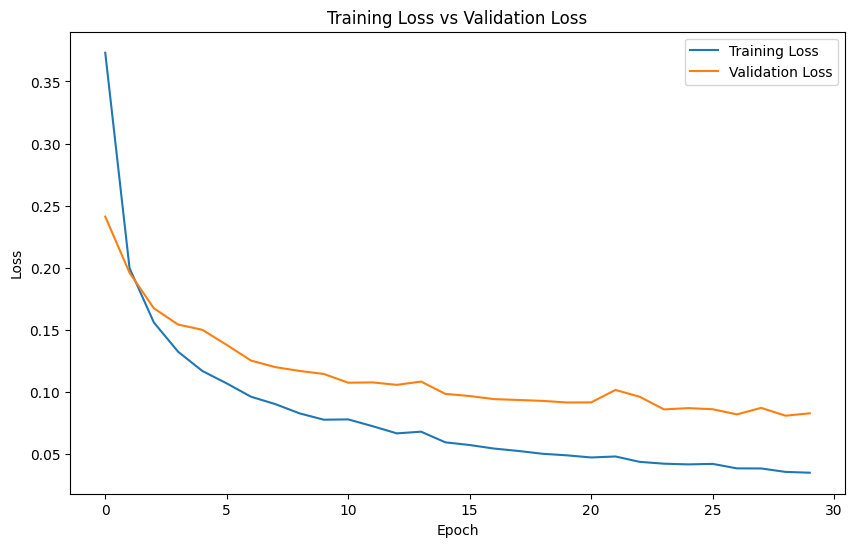

In [ ]:
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = eff_model.fit(x_train_scaled , y_train,
           epochs=30, validation_data=(x_test_scaled,y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs 50

Epoch 1/50
75/75 [==============================] - 16s 116ms/step - loss: 0.3915 - accuracy: 0.8171 - val_loss: 0.2168 - val_accuracy: 0.9267
Epoch 2/50
75/75 [==============================] - 6s 78ms/step - loss: 0.2104 - accuracy: 0.9308 - val_loss: 0.1546 - val_accuracy: 0.9683
Epoch 3/50
75/75 [==============================] - 6s 78ms/step - loss: 0.1686 - accuracy: 0.9471 - val_loss: 0.1239 - val_accuracy: 0.9733
Epoch 4/50
75/75 [==============================] - 6s 77ms/step - loss: 0.1453 - accuracy: 0.9558 - val_loss: 0.1085 - val_accuracy: 0.9717
Epoch 5/50
75/75 [==============================] - 6s 76ms/step - loss: 0.1294 - accuracy: 0.9583 - val_loss: 0.0983 - val_accuracy: 0.9783
Epoch 6/50
75/75 [==============================] - 6s 77ms/step - loss: 0.1191 - accuracy: 0.9658 - val_loss: 0.0884 - val_accuracy: 0.9783
Epoch 7/50
75/75 [==============================] - 6s 76ms/step - loss: 0.1108 - accuracy: 0.9658 - val_loss: 0.0799 - val_accuracy: 0.9800
Epoch 8/50


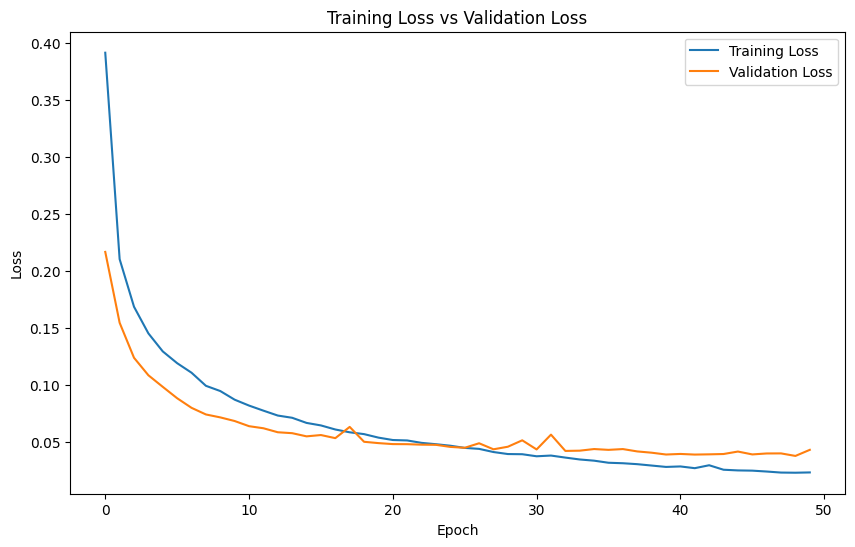

In [ ]:
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = eff_model.fit(x_train_scaled , y_train,
           epochs=50, validation_data=(x_test_scaled,y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

early stopping with more epochs

Epoch 1/70
75/75 [==============================] - 17s 121ms/step - loss: 0.3573 - accuracy: 0.8496 - val_loss: 0.2252 - val_accuracy: 0.9267
Epoch 2/70
75/75 [==============================] - 6s 79ms/step - loss: 0.2016 - accuracy: 0.9312 - val_loss: 0.1605 - val_accuracy: 0.9600
Epoch 3/70
75/75 [==============================] - 6s 78ms/step - loss: 0.1603 - accuracy: 0.9483 - val_loss: 0.1386 - val_accuracy: 0.9517
Epoch 4/70
75/75 [==============================] - 6s 77ms/step - loss: 0.1381 - accuracy: 0.9542 - val_loss: 0.1193 - val_accuracy: 0.9700
Epoch 5/70
75/75 [==============================] - 6s 78ms/step - loss: 0.1227 - accuracy: 0.9604 - val_loss: 0.1118 - val_accuracy: 0.9700
Epoch 6/70
75/75 [==============================] - 6s 79ms/step - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.1000 - val_accuracy: 0.9717
Epoch 7/70
75/75 [==============================] - 6s 78ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 0.0921 - val_accuracy: 0.9733
Epoch 8/70


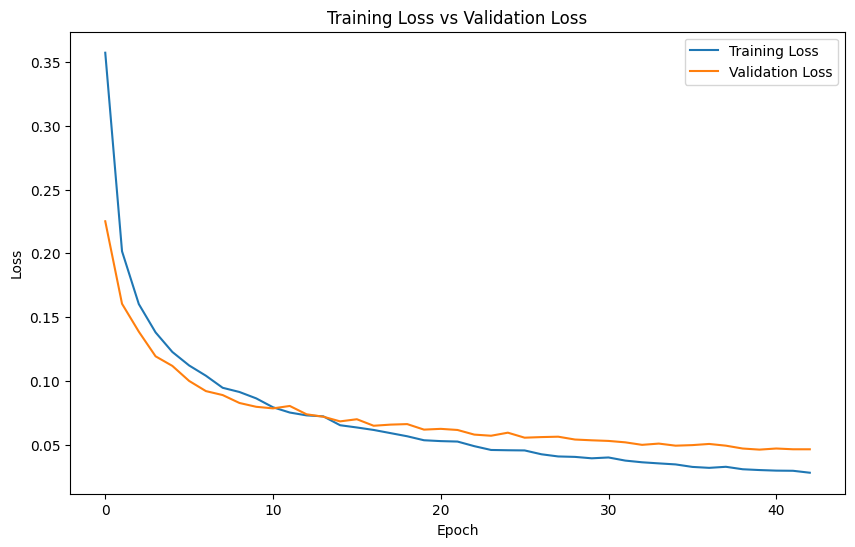

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history= eff_model.fit(x_train_scaled , y_train,
           epochs=70, validation_data=(x_test_scaled,y_test),callbacks=[early_stopping])

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()